## **Predección de la solubilidad acuosa de compuestos químicos**

<div style="text-align: center;">
  <img src="https://cards.algoreducation.com/_next/image?url=https%3A%2F%2Ffiles.algoreducation.com%2Fproduction-ts%2F__S3__a574fb50-e2b4-49f9-a11a-f879e40ef60e&w=3840&q=75" alt="Descripción de la Imagen" style="width: 50%; height: auto;">

### **Dataset:** https://www.kaggle.com/datasets/prashanthbairu/delaney-solubility-with-descriptors
### **Ing. Marcelo Mendoza - Data Analyst & Data Scientist**

### **1 Librerías utilizadas**

In [87]:
import pandas as pd #Librería para trabajar con objetos de tipo DataFrame para carga de datos y transformación
import numpy as np  #Librería para realizar cálculos a través de arrays
import matplotlib.pyplot as plt #Librería para trabajar con gráficos
from sklearn.preprocessing import StandardScaler, PowerTransformer # Librerías para realizar procesos de normalización y escalar datos

### **2 Carga de datos**

In [88]:
#Activamos el acceso a google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
datos = pd.read_csv('/content/drive/MyDrive/Data/delaney_solubility_with_descriptors.csv')    #Objeto que permite leer uun archivo de tipo .csv desde una ubicación de google drive

### **3 Preprocesamiento**
- Procedemos a mostrar la información del dataset a través del metodo info

In [90]:
datos.info()  #Función que muestra información del archivo cargado como es su estructura, tipo de datos, y variables.
print('\n Número de: Filas y Variables: ',datos.shape)  #Imprimo en pantalla las dimensiones del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB

 Número de: Filas y Variables:  (1144, 5)


- El conunto de datos cargado, contiene 1144 registros, y un total de 5 variables o características.
- Podemos observar que las variables no tienen valores nulos y todas son de tipo numérico decimal.
- En este caso se define que la variable objetivo a predecir: **logS**
- La variable logs es el logaritmo de la solubilidad medida en agua.

- Procedemos a mostrar los primeros y últimos 10 registros:

In [91]:
datos.head(10)  #Método para mostrar los primeros registros de un dataframe

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04
5,1.8100,98.960,0.0,0.0,-1.29
6,1.9352,96.944,0.0,0.0,-1.64
7,1.4054,118.176,4.0,0.0,-0.43
8,4.3002,215.894,0.0,0.6,-4.57
9,2.5654,132.206,0.0,0.6,-4.37


In [92]:
datos.tail(10)  #Método para mostrar los últimos registros de un dataframe

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1134,-1.37500,266.257,2.0,0.473684,-1.950
1135,-0.93680,112.088,0.0,0.750000,-1.488
1136,-0.97620,60.056,0.0,0.000000,0.960
1137,-1.76720,168.112,0.0,0.750000,-3.930
1138,1.37550,86.134,3.0,0.000000,-0.850
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790
1143,2.02164,179.219,1.0,0.461538,-2.581


### **4 Descripción de variables:**
- **MolLogP:**
  - Representa el logaritmo del coeficiente de partición octanol-agua (LogP) de la molécula.
  - Este coeficiente mide la hidrofobicidad o lipofilia de un compuesto, es decir, qué tan bien se disuelve en lípidos (como el aceite) en comparación con el agua.
  - Un valor más alto de LogP indica que la molécula es más hidrofóbica, mientras que un valor bajo sugiere que es más hidrofílica.
- **MolWt:**
  - Es el peso molecular de la molécula, medido en unidades de masa atómica (daltons).
  - El peso molecular es la suma de las masas de todos los átomos en una molécula y es importante para determinar su comportamiento en soluciones, biodisponibilidad, y transporte dentro de organismos.
- **NumRotatableBonds:**
  - Indica el número de enlaces rotables de la molécula.
  - Estos son enlaces sencillos (no de anillo) que conectan átomos y que pueden rotar, lo que permite que la molécula adopte diferentes conformaciones en el espacio.
- **AromaticProportion:**
  - Este descriptor mide la proporción de átomos de carbono en sistemas aromáticos en relación con el total de átomos de carbono en la molécula.

- Procedemos a mostrar un resumen estadístico de las varables de estúdio:

In [93]:
datos.describe()  #Muestra un resumen estadístico del dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


**Comentario:**
- Según la tabla estadística, podemos observar que las variables se encuentran en diferentes escalas, esto puede afectar el resultado de la predicción del modelo.
- La variable objetivo **logS** representa el logaritmo de la solubilidad, presenta una media negativa, lo que indica que la mayoría de compuestos no son solubles al agua, esto se puede observar en la distribución de los percentiles.
- La variable **Molwt** que es el peso molecular, está representada en unidades de medidas en una escala diferente, por tanto se debe normalizar.

### **5 Distribución de los datos**
- Procedemos a mostrar un histograma para validar la distribución de los datos de las variables de estúdio.

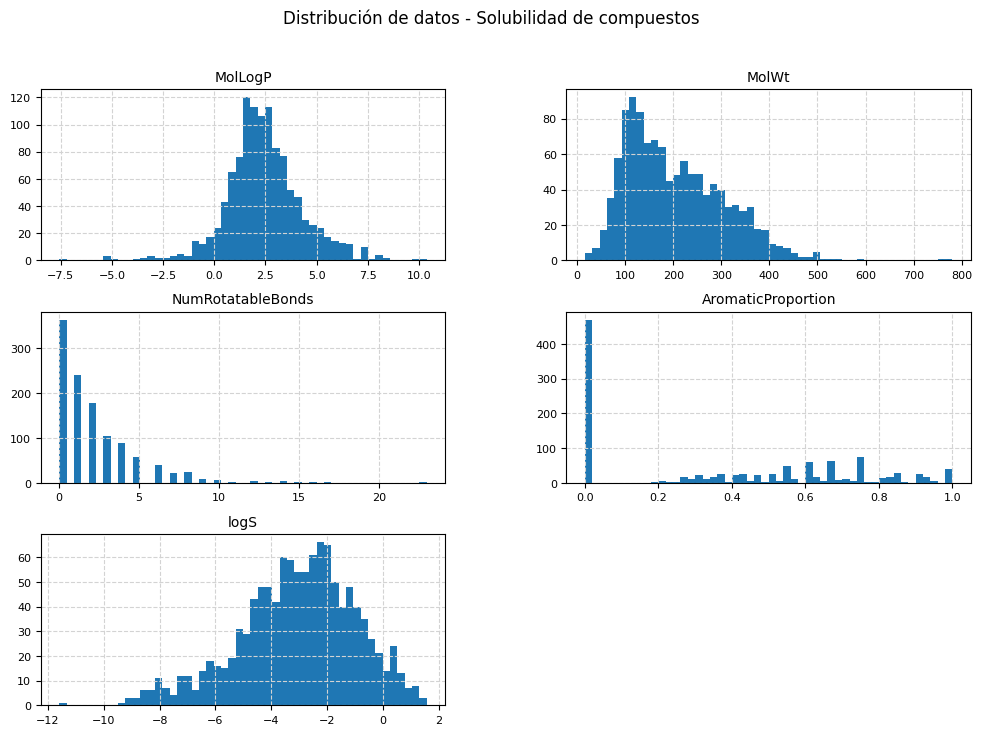

In [94]:
#Modificamos algunos parámetros que vienen por defecto de la libreria matplotlib

plt.rc('grid', linestyle='--', color='lightgray') #Modificamos el tipo de cuadricula con puntos y el color
plt.rc('font', size=10) #Establecemos el tamaño de letra a 10
plt.rc('axes', titlesize=10) #Establecemos en tamaño 10 los valores y titulos de los ejes
plt.rc('xtick', labelsize=8)  #Establecemos el tamaño de letra para los valores para el eje x
plt.rc('ytick', labelsize=8)  #Establecemos el tamaño de letra para los valores del eje y

#Generamos el gráfico
datos.hist(bins=50, figsize=(12,8)) #Genera el histograma, establecemos el tamaño en pulgadas, y definimos el numero de divisiones del gráfico en 50.
plt.suptitle('Distribución de datos - Solubilidad de compuestos', fontsize = 12) #Configuro el título del gráfico con letra tamaño 12
plt.show()  #Esta línea muestra el gráfico en pantalla.

**Comentario:**
- Como se observa en el gráfico anterior, tenemos variables con una distribución que se apartan de la normalidad.
- De igual manera ciertas variables presentan sesgo hacia la izquierda de la distribución, por la naturaleza del conjunto de datos en el cual se manejan valores negativos.

### **6 Generación de Datasets de entrenamiento y pruebas**

In [95]:
from sklearn.model_selection import train_test_split  #Importamos librería para dividir el dataset en 2 partes para train y test

x = datos.drop('logS', axis=1)  #Elimino la variable objetivo o etiquetas
y = datos['logS'] #Asigno las etiquetas al objeto

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #Generamos el conjunto de datos para entrenamiento y pruebas

In [96]:
#Creamos copia de los datasets para no modificar los originales
dtrain = x_train.copy()
dtest = x_test.copy()

### **7 Normalización de datos**
- Procedemos a normalizar los datos, para que se acerquen a una distribución normal.
- Procedemos a normalizar los datos de las variable, a través del método PowerTransform de sklearn.

In [97]:
pt = PowerTransformer(method='yeo-johnson') #Aplicamos el metodo yeo-johnson que reduce el sesgo y normaliza la distribución de los datos
dtrain = pt.fit_transform(dtrain) #Aplicamos a los datos de entrenamiento
dtest = pt.fit_transform(dtest) #Aplicamos a los datos de prueba

### **8 Escalado de variables**
- Procedemos a realizar el escalado de variables.

In [98]:
scaler = StandardScaler() #Llamada al metodo para escalar las variables
dtrain = scaler.fit_transform(dtrain) #Aplicamos a los datos de entrenamiento
dtest = scaler.fit_transform(dtest) #Aplicamos a los datos de prueba

In [99]:
# Convertir la matriz dispersa a DataFrame
x_train_df = pd.DataFrame(dtrain, columns=x_train.columns, index=x_train.index)
x_test_df = pd.DataFrame(dtest, columns=x_test.columns, index=x_test.index)

In [100]:
# Mostrar en pantalla las dimensiones de los conjuntos procesados
print("Dimensiones del conjunto de entrenamiento procesado:", x_train_df.shape)
print("Dimensiones del conjunto de prueba procesado:", x_test_df.shape)

Dimensiones del conjunto de entrenamiento procesado: (915, 4)
Dimensiones del conjunto de prueba procesado: (229, 4)


### **9 Creación de Modelos**
- Procedemos a realizar la creación de los modelos de ML supervisados, debido a que se conocen los valores objetivos o las etiquetas de los datos de solubilidad de los compuestos químicos.
- Los modelos de aprendizaje automáticos supervisados serán de regresión, puesto que el objetivo es predecir un valor numérico en este caso el indice de solubilidad **logS**.
- Bajo esta premisa, para el caso de estudio se crearan los siguientes modelos supervisados:
  - Regresión Lineal
  - Árbol de Decisión
  - Random Forest
  - Support Vector Regression (SVR)

- Vamos a generar los conjuntos de datos para train y test, utilizando todas las variables predictoras, debido a que el conjunto de datos tiene pocas características de estúdio.

In [101]:
#Asignamos a los datasets los datos ya listos para crear modelos de ML
x_train = x_train_df.copy()
x_test = x_test_df.copy()

#### **9.1 Regresión Lineal**
- Se procede a crear un modelo de regresión lineal, el mismo que permite predecir valores numéricos.
- Este modelo permite predecir una variable numérica en función de varias variables independientes o predictoras.

In [102]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #Creamos el modelo
lr.fit(x_train, y_train)  #Entrenamos el modelo

LinearRegression()

In [103]:
#Realizamos predicciones
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_train_pred[:10].round(2) #Mostramos algunas predicciones en este caso los 10 primeros elementos

array([-4.62, -6.23, -4.23, -0.59, -1.67, -0.92, -1.39, -2.54, -2.75,
       -2.02])

In [104]:
y_train.iloc[:10].values  #Mostramos los 10 primeros elementos

array([-4.3  , -8.4  , -3.754,  0.   , -1.34 , -1.94 , -0.8  , -2.32 ,
       -3.2  , -2.21 ])

- Evaluamos el modelo, en este caso vamos a trabajar con 2 métricas:
  - Error cuadrático medio.
  - Coeficiente de determinación.

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [106]:
#Mostramos resultados:
lr_results = pd.DataFrame(['Regresión Lineal', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Modelo', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
lr_results

,Modelo,Train MSE,Train R2,Test MSE,Test R2
0,Regresión Lineal,0.948062,0.784499,0.968177,0.777663


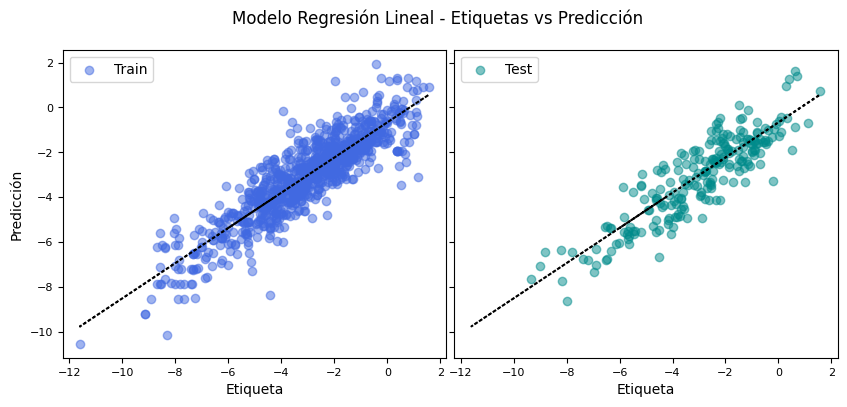

In [107]:
#Generamos gráfico de dispersión
 #Generamos una matriz de gráficos de 1f x 2c y configuramos que el eje sea compartido
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#Ajusto el espacio
plt.subplots_adjust(wspace=0.02)
#configuramos los datos para los puntos con los datos de train y test
axs[0].scatter(x=y_train, y=y_lr_train_pred, c='#4169E1', label='Train', alpha=0.5)
axs[1].scatter(x=y_test, y=y_lr_test_pred, c='#008B8B', label='Test', alpha=0.5)
#Graficamos linea de  regresión de los datos
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
axs[0].plot(y_train, p(y_train), 'black', linestyle=':')
axs[1].plot(y_train, p(y_train), 'black', linestyle=':')

#configuramos parámetros para dar formato al gráfico
axs[0].set_xlabel('Etiqueta')
axs[1].set_xlabel('Etiqueta')
axs[0].set_ylabel('Predicción')
plt.suptitle('Modelo Regresión Lineal - Etiquetas vs Predicción')
axs[0].legend()
axs[1].legend()
plt.show()

**Comentario:**
- Se puede observar que el modelo de regresión lineal, aprende bien con los datos de entrenamiento, aunque presenta algunas predicciones que se alejan del valor de la etiqueta.
- En cuanto a los datos de prueba logró realilzar una gran parte de predicciones correctas, sin embargo en algunos casos tambein generaliza mal, se podría decir que es un modelo aceptable.

#### **9.2 Árboles de Decisión**
- Este modelo, clasifica los datos dependiendo de las decisiones que se van tomando hasta llegar al resultado final o la predicción.
- Permite encontrar relaciones no lineales.

In [108]:
from sklearn.tree import DecisionTreeRegressor

ad = DecisionTreeRegressor() #Creamos el modelo
ad.fit(x_train, y_train)  #Entrenamos el modelo

DecisionTreeRegressor()

In [109]:
#Realizamos predicciones
y_ad_train_pred = ad.predict(x_train)
y_ad_test_pred = ad.predict(x_test)
y_ad_train_pred[:10].round(2) #Mostramos algunas predicciones en este caso los 10 primeros elementos

array([-4.3 , -8.4 , -3.75,  0.  , -1.34, -1.94, -0.75, -2.32, -3.3 ,
       -2.21])

In [110]:
y_train.iloc[:10].values  #Mostramos los 10 primeros elementos

array([-4.3  , -8.4  , -3.754,  0.   , -1.34 , -1.94 , -0.8  , -2.32 ,
       -3.2  , -2.21 ])

- Evaluamos el modelo, en este caso vamos a trabajar con 2 métricas:
  - Error cuadrático medio.
  - Coeficiente de determinación.

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
#Para train
ad_train_mse = mean_squared_error(y_train, y_ad_train_pred)
ad_train_r2 = r2_score(y_train, y_ad_train_pred)
#Para test
ad_test_mse = mean_squared_error(y_test, y_ad_test_pred)
ad_test_r2 = r2_score(y_test, y_ad_test_pred)

In [112]:
#Mostramos resultados:
ad_results = pd.DataFrame(['Árboles de Decisión', ad_train_mse, ad_train_r2, ad_test_mse, ad_test_r2]).transpose()
ad_results.columns = ['Modelo', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
ad_results

,Modelo,Train MSE,Train R2,Test MSE,Test R2
0,Árboles de Decisión,0.021127,0.995198,1.169347,0.731465


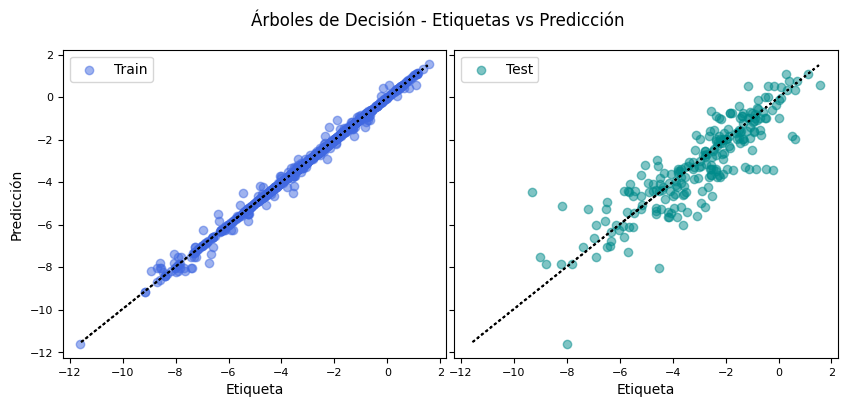

In [113]:
#Generamos gráfico de dispersión
 #Generamos una matriz de gráficos de 1f x 2c y configuramos que el eje sea compartido
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#Ajusto el espacio
plt.subplots_adjust(wspace=0.02)
#configuramos los datos para los puntos con los datos de train y test
axs[0].scatter(x=y_train, y=y_ad_train_pred, c='#4169E1', label='Train', alpha=0.5)
axs[1].scatter(x=y_test, y=y_ad_test_pred, c='#008B8B', label='Test', alpha=0.5)
#Graficamos linea de  regresión de los datos
z = np.polyfit(y_train, y_ad_train_pred, 1)
p = np.poly1d(z)
axs[0].plot(y_train, p(y_train), 'black', linestyle=':')
axs[1].plot(y_train, p(y_train), 'black', linestyle=':')

#configuramos parámetros para dar formato al gráfico
axs[0].set_xlabel('Etiqueta')
axs[1].set_xlabel('Etiqueta')
axs[0].set_ylabel('Predicción')
plt.suptitle('Árboles de Decisión - Etiquetas vs Predicción')
axs[0].legend()
axs[1].legend()
plt.show()

**Comentario:**
- En el caso del modelo de árboles de decisión, podemos decir que aprende bien con los datos de entrenamiento.
- Con datos que no conoce el modelo, es decir con datos de test, ya no predice de forma, correcta, el modelo claramente está con sobreajuste (overfitting).

#### **9.3 Random Forest**
- Permite entrenar muchos árboles de decisión en sub-conjuntos aleatorios de las variables y obtiene un promedio de sus predicciones.

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [115]:
#Realizamos predicciones
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_train_pred[:10].round(2) #Mostramos algunas predicciones en este caso los 10 primeros elementos

array([-4.53, -8.21, -4.07,  0.04, -1.29, -2.01, -0.75, -2.  , -3.32,
       -2.13])

In [116]:
y_train.iloc[:10].values  #Mostramos los 10 primeros elementos

array([-4.3  , -8.4  , -3.754,  0.   , -1.34 , -1.94 , -0.8  , -2.32 ,
       -3.2  , -2.21 ])

- Evaluamos el modelo, en este caso vamos a trabajar con 2 métricas:
  - Error cuadrático medio.
  - Coeficiente de determinación.

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
#Para train
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
#Para test
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [118]:
#Mostramos resultados:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Modelo', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
rf_results

,Modelo,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,0.091247,0.979259,0.592269,0.863988


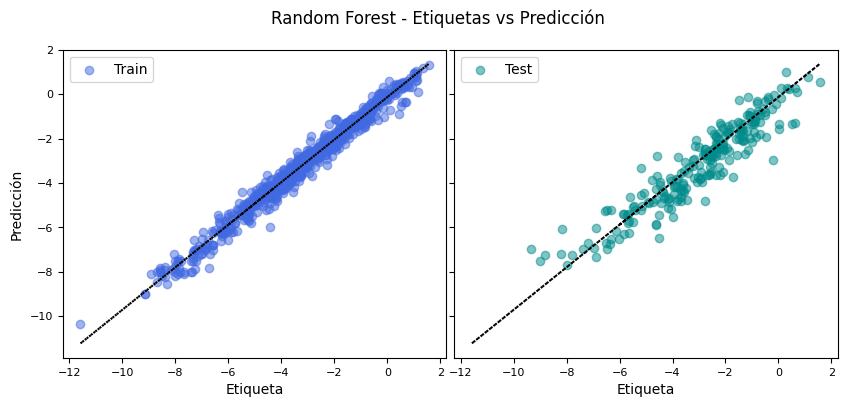

In [119]:
#Generamos gráfico de dispersión
 #Generamos una matriz de gráficos de 1f x 2c y configuramos que el eje sea compartido
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#Ajusto el espacio
plt.subplots_adjust(wspace=0.02)
#configuramos los datos para los puntos con los datos de train y test
axs[0].scatter(x=y_train, y=y_rf_train_pred, c='#4169E1', label='Train', alpha=0.5)
axs[1].scatter(x=y_test, y=y_rf_test_pred, c='#008B8B', label='Test', alpha=0.5)
#Graficamos linea de  regresión de los datos
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
axs[0].plot(y_train, p(y_train), 'black', linestyle=':')
axs[1].plot(y_train, p(y_train), 'black', linestyle=':')

#configuramos parámetros para dar formato al gráfico
axs[0].set_xlabel('Etiqueta')
axs[1].set_xlabel('Etiqueta')
axs[0].set_ylabel('Predicción')
plt.suptitle('Random Forest - Etiquetas vs Predicción')
axs[0].legend()
axs[1].legend()
plt.show()

**Comentario**
- En este caso el modelo se ajusta bien a datos de entrenamiento.
- En cuanto al conjunto de test, logra un buen número de predicciones correcta, el modelo se adapta bien y los resultados son aceptables.

#### **9.4 Support Vector Regression (SVR)**

- Procedemos a crear un modelo Support Vector Regression (SVR), que funciona bien con conjunto de datos no lineales, sin embargo lo vamos a evaluar.
- Establecemos el kernel linear y el valor de C(Penalización), que determina la tolerancia al error.
- El valor de epsilon, determina el margen de tolerancia al error.

In [120]:
from sklearn.svm import SVR

sup = SVR(kernel='linear', C=0.01, epsilon=0.1)
sup.fit(x_train, y_train)

SVR(C=0.01, kernel='linear')

In [121]:
#Realizamos predicciones
y_sup_train_pred = sup.predict(x_train)
y_sup_test_pred = sup.predict(x_test)
y_sup_train_pred[:10].round(2) #Mostramos algunas predicciones en este caso los 10 primeros elementos

array([-4.34, -5.78, -4.18, -0.53, -1.55, -0.76, -1.29, -2.27, -2.68,
       -2.06])

In [122]:
y_train.iloc[:10].values  #Mostramos los 10 primeros elementos

array([-4.3  , -8.4  , -3.754,  0.   , -1.34 , -1.94 , -0.8  , -2.32 ,
       -3.2  , -2.21 ])

- Evaluamos el modelo, en este caso vamos a trabajar con 2 métricas:
  - Error cuadrático medio.
  - Coeficiente de determinación.

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
#Para train
sup_train_mse = mean_squared_error(y_train, y_sup_train_pred)
sup_train_r2 = r2_score(y_train, y_sup_train_pred)
#Para test
sup_test_mse = mean_squared_error(y_test, y_sup_test_pred)
sup_test_r2 = r2_score(y_test, y_sup_test_pred)

In [124]:
#Mostramos resultados:
sup_results = pd.DataFrame(['Support Vector Regression(SVR)', sup_train_mse, sup_train_r2, sup_test_mse, sup_test_r2]).transpose()
sup_results.columns = ['Modelo', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
sup_results

,Modelo,Train MSE,Train R2,Test MSE,Test R2
0,Support Vector Regression(SVR),0.984465,0.776224,1.010466,0.767951


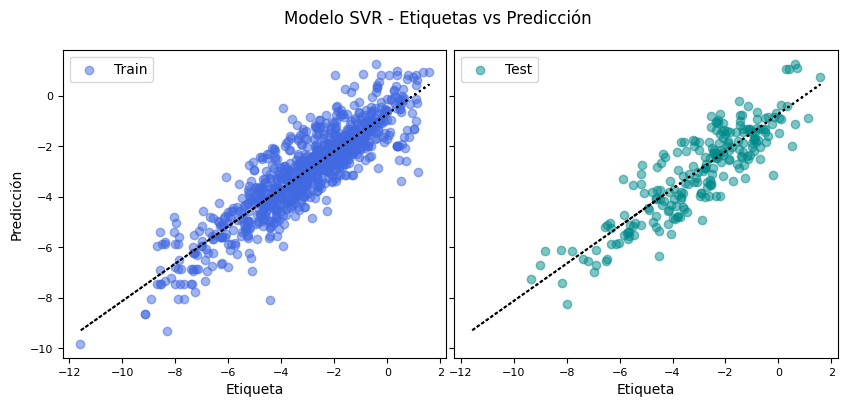

In [125]:
#Generamos gráfico de dispersión
 #Generamos una matriz de gráficos de 1f x 2c y configuramos que el eje sea compartido
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
#Ajusto el espacio
plt.subplots_adjust(wspace=0.02)
#configuramos los datos para los puntos con los datos de train y test
axs[0].scatter(x=y_train, y=y_sup_train_pred, c='#4169E1', label='Train', alpha=0.5)
axs[1].scatter(x=y_test, y=y_sup_test_pred, c='#008B8B', label='Test', alpha=0.5)
#Graficamos linea de  regresión de los datos
z = np.polyfit(y_train, y_sup_train_pred, 1)
p = np.poly1d(z)
axs[0].plot(y_train, p(y_train), 'black', linestyle=':')
axs[1].plot(y_train, p(y_train), 'black', linestyle=':')

#configuramos parámetros para dar formato al gráfico
axs[0].set_xlabel('Etiqueta')
axs[1].set_xlabel('Etiqueta')
axs[0].set_ylabel('Predicción')
plt.suptitle('Modelo SVR - Etiquetas vs Predicción')
axs[0].legend()
axs[1].legend()
plt.show()

**Observación:**
- En cuanto al modelo SVR, el gráfico es similar al de regresión lineal, aprende bien con datos de train, sin embargo tambien presenta algunas rpedicciones incorrectas.
- Se puede identificar algo de subajuste(underfitting), sin embargo predice algunos datos de forma correcta con los datos de prueba.

### **10 Evaluación de Modelos**

In [126]:
#Generamos un Dataframe Pandas para analizar de mejor manera los resultados:

datos = {'Modelo': ['Regresión Lineal', 'Árboles de Decisión', 'Random Forest','Support Vector Regression(SVR)'],
        'Train MSE': [lr_train_mse, ad_train_mse, rf_train_mse, sup_train_mse],
        'Train R2': [lr_train_r2, ad_train_r2, rf_train_r2, sup_train_r2],
        'Test MSE': [lr_test_mse, ad_test_mse, rf_test_mse, sup_test_mse],
        'Test R2': [lr_test_r2, ad_test_r2, rf_test_r2, sup_test_r2]
         }

total_resul = pd.DataFrame(datos, columns=['Modelo','Train MSE','Train R2','Test MSE','Test R2'])

In [127]:
total_resul #Mostramos el DataFrame generado

,Modelo,Train MSE,Train R2,Test MSE,Test R2
0,Regresión Lineal,0.948062,0.784499,0.968177,0.777663
1,Árboles de Decisión,0.021127,0.995198,1.169347,0.731465
2,Random Forest,0.091247,0.979259,0.592269,0.863988
3,Support Vector Regression(SVR),0.984465,0.776224,1.010466,0.767951


- Procedemos a generar visualizaciones de los resultados obtenidos de las métricas analizadas:

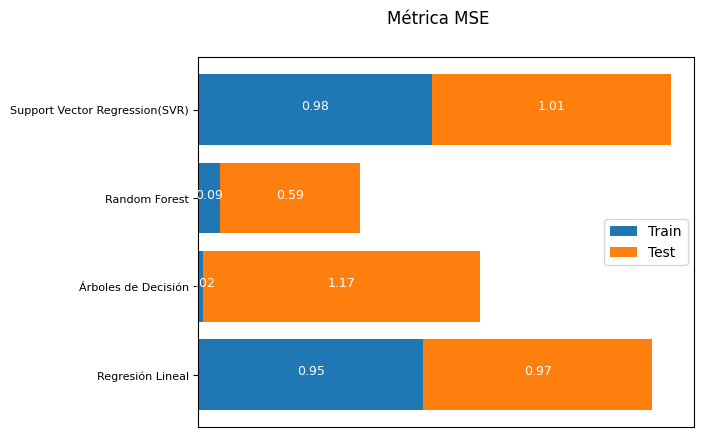

In [128]:
#Generamos un gráfico de barras apiladas horizontal
valoresTEST_MSE = total_resul['Test MSE'] #Almacenamos los valores de Test
valoresTRAIN_MSE = total_resul['Train MSE'] #Almacenamos los valores de Train
Models = total_resul['Modelo']  #Almacenamos los nombres de los modelos
#Generamos el gráfico
fig, ax = plt.subplots()
ax.barh(Models, valoresTRAIN_MSE, label = 'Train') #Mostramos valores de train
ax.barh(Models, valoresTEST_MSE, left=valoresTRAIN_MSE, label = 'Test') #Mostramos valores de test

#Ciclo para mostrar los valores de las etiquetas
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_width(),2), ha = 'center',
          color = 'w', size = 9)

ax.set_xticks([]) #Borramos los valores del eje X
ax.legend() #Mostramos la legenda de los datos
plt.suptitle('Métrica MSE')  #Generamos el título
plt.show()

**Comentario:**
- Analizando la metrica MSE, podemos visualizar que los modelos con MSE bajos son random forest y árbol de decisión, lo que es beneficioso para el modelo, sin embargo puede que exista algo de overfitting o sobreajuste.
- Mientras tanto, los modelos SVR y regresión lineal presentan un MSE alto tanto para datos de train como test, lo que puede indicar un subajuste o underfitting.

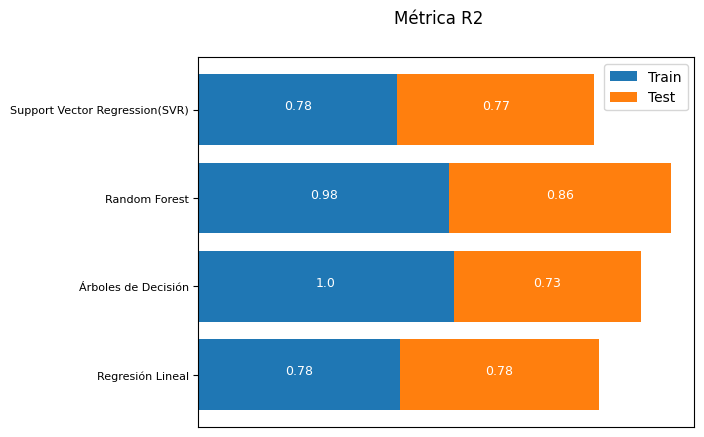

In [129]:
valoresTEST_MSE = total_resul['Test R2']
valoresTRAIN_MSE = total_resul['Train R2']
Models = total_resul['Modelo']
fig, ax = plt.subplots()
ax.barh(Models, valoresTRAIN_MSE, label = 'Train')
ax.barh(Models, valoresTEST_MSE, left=valoresTRAIN_MSE, label = 'Test')

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_width(),2), ha = 'center',
          color = 'w', size = 9)

ax.set_xticks([])

ax.legend()
plt.suptitle('Métrica R2')
plt.show()

**Comentario:**
- Se puede llegar a la conclusión que los modelos random forest y árboles de desición, el valor del coeficiente es mayor en los datos de entrenamiento, y están cercanos al 1 sin embargo, puede existir algo de sobreajuste por su coeficiente con datos de prueba.
- Por otro lado losmodelos SVR y Regresión lineal presentan valores más equilibrados para el coeficiente R2, se puede decir que estos modelos generalizan mejor los datos.

### **11 Conclusiones:**
- Se realizó el análisis del dataset **_delaney_solubility_with_descriptors.csv_** , y se aplicaron técnicas de transformación y normalización.
- Se dividió el dataset en 2 conjuntos de datos, para entrenamiento y pruebas del modelo.
- Se realizó la creación de 4 modelos de Machine Learning para su respectivo análisis de precisión con datos de entrenamiento y pruebas.
- Para evaluar los modelos de machine learning se utilizaron dos métricas de rendimiento de los modelos, las mismas que son MSE(Error cuadrático Medio) y R2(coeficiente de determinación)
- Se generaron gráficas de dispersión para evaluar el comportamiento de los modelos, tanto con datos de entrenamiento como pruebas.
- Al final se generaron gráficos de barras para comparar el rendimiento de los modelos según las métricas generadas.
- Por último se puede concluir que el modelo que mejor se adapta a los datos es el modelo **Random Forest**, debido a que presenta un MSE bajo y el coeficiente R2 está equilibrado tanto para los datos de train como test.
- Sin embargo no se debe descartar el modelo de Regresión Lineal que tambien presenta resultados aceptables.